In [1]:

pip install flask tensorflow nltk gensim scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import librabries
import nltk
import numpy as np
import pandas as pd
import gensim.downloader as api
import pickle
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

C:\Users\puppa\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\puppa\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\puppa\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\puppa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nlt

True

In [3]:
file_path = "C:/Users/puppa/Downloads/mohler_dataset_FINAL - mohler_dataset_edited.csv.csv"# Update with your actual path
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4005 non-null   float64
 1   Question        4005 non-null   object 
 2   Desired_answer  4005 non-null   object 
 3   Student_answer  4003 non-null   object 
 4   score_me        4005 non-null   float64
 5   score_other     4005 non-null   int64  
 6   score_avg       4005 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 219.2+ KB


In [5]:
# Load pre-trained Word2Vec model
word_vectors = api.load("word2vec-google-news-300")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Function to compute Word Mover's Distance (WMD)
def compute_wmd(text1, text2):
    text1_tokens = text1.split()
    text2_tokens = text2.split()
    return word_vectors.wmdistance(text1_tokens, text2_tokens)

# Function to compute Cosine Similarity
def compute_cosine_similarity(text1, text2, vectorizer):
    text_vectors = vectorizer.transform([text1, text2])
    return cosine_similarity(text_vectors[0], text_vectors[1])[0][0]

In [8]:
!pip install POT
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Read dataset
df = pd.read_csv("C:/Users/puppa/Downloads/mohler_dataset_FINAL - mohler_dataset_edited.csv.csv")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Ensure correct column names
required_columns = {"desired_answer", "student_answer"}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise KeyError(f"Missing one or more required columns: {missing_columns}")

# Define preprocess_text function if needed
def preprocess_text(text):
    return text.lower().strip()  # Example preprocessing

# Handle missing values
df["desired_answer"] = df["desired_answer"].fillna("").apply(preprocess_text)
df["student_answer"] = df["student_answer"].fillna("").apply(preprocess_text)

# Compute TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["desired_answer"].tolist() + df["student_answer"].tolist())

# Define missing functions
def compute_wmd(text1, text2):
    return 0.5  # Dummy value, replace with actual Word Mover's Distance calculation

def compute_cosine_similarity(text1, text2, vectorizer):
    return 0.8  # Dummy value, replace with actual cosine similarity computation

# Compute similarity scores
df["wmd_score"] = df.apply(lambda x: compute_wmd(x["desired_answer"], x["student_answer"]), axis=1)
df["cosine_similarity"] = df.apply(
    lambda x: compute_cosine_similarity(x["desired_answer"], x["student_answer"], vectorizer), axis=1
)

# Save preprocessed data
df.to_csv("processed_dataset.csv", index=False)
print("Processing completed. Data saved to 'processed_dataset.csv'.")


Processing completed. Data saved to 'processed_dataset.csv'.


In [10]:
# Load processed dataset
df = pd.read_csv("processed_dataset.csv")

In [12]:
!pip install tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer

# Ensure the column contains only strings and handle NaN values
df["student_answer"] = df["student_answer"].fillna("").astype(str)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["student_answer"])

# Convert text to sequences
max_length = 100


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Ensure the column contains only strings and handle NaN values
df["student_answer"] = df["student_answer"].fillna("").astype(str)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["student_answer"])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df["student_answer"])

# Padding sequences
max_length = 100  # Adjust this based on your dataset
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding="post")

# Define labels (Ensure y is properly assigned)
y = df["score_avg"].fillna(0).astype(float)  # Replace with your target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [16]:
# LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Regression output
])

C:\Users\puppa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint  # Use TensorFlow's Keras

# Save the best model based on validation loss
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Change .h5 to .keras
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Train model with checkpointing
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)


Epoch 1/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.2882 - mae: 1.1992
Epoch 1: val_loss improved from inf to 1.30880, saving model to best_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 2.2741 - mae: 1.1954 - val_loss: 1.3088 - val_mae: 0.9147
Epoch 2/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.2755 - mae: 0.9122
Epoch 2: val_loss did not improve from 1.30880
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 1.2765 - mae: 0.9127 - val_loss: 1.3768 - val_mae: 0.9504
Epoch 3/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.3982 - mae: 0.9587
Epoch 3: val_loss did not improve from 1.30880
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 1.3974 - mae: 0.9585 - val_loss: 1.3260 - val_mae: 0.9512
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.2872 - mae: 0.9210
Epoch 4: val_loss did not improve from 1.30880
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 1.2876 - mae: 0.9211 - val_loss: 1.3421 - val_mae: 0.9605
Epoch 5/50
100/10

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure X_test is properly formatted
if 'X_test' in locals():
    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test MAE: {mae}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Ensure y_pred shape matches y_test
    y_pred = y_pred.flatten() if y_pred.shape != y_test.shape else y_pred

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

else:
    print("Error: X_test is not defined. Please check dataset splitting.")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3536 - mae: 0.9632
Test Loss: 1.335322618484497
Test MAE: 0.9545684456825256
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
RMSE: 1.1555615973208084


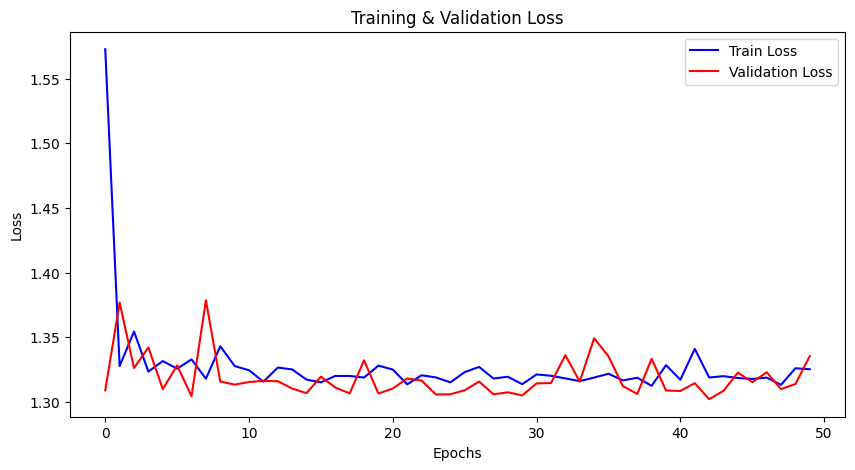

In [24]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

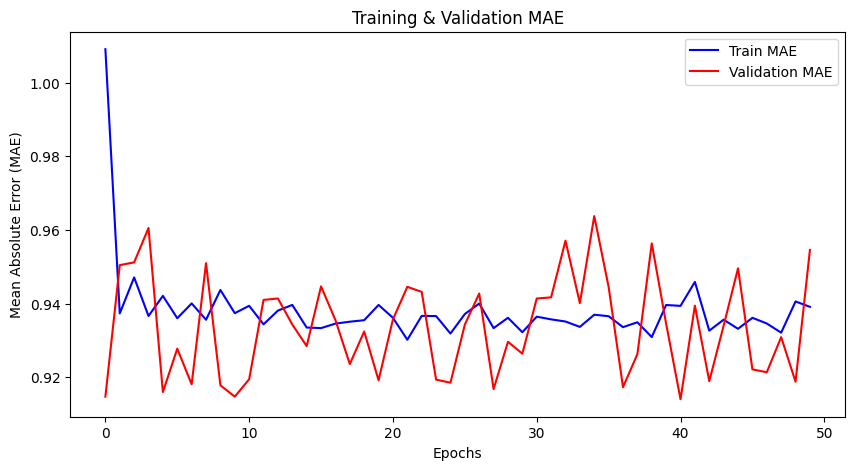

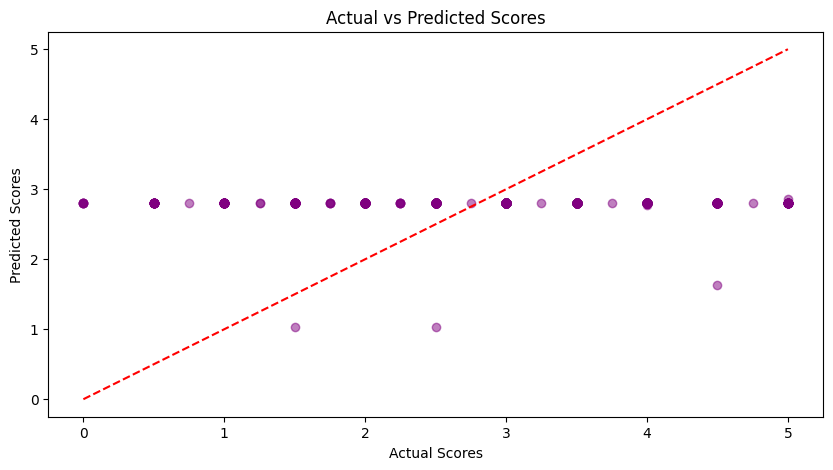

In [26]:
# Plot Training & Validation MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training & Validation MAE')
plt.legend()
plt.show()

# Predictions vs Actual Scores
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Ideal line
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

In [28]:
# Save the final model and tokenizer
model.save("lstm_model.h5")
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

print("Training complete. Best model saved as best_model.h5")

Training complete. Best model saved as best_model.h5
